In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#Read data

df = pd.read_csv(r'C:\Users\diego\OneDrive\Documentos\Python\movies.csv')
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


To search for missing data, a for loop is used that loops through every column.
For each column, the code calculates the percentage missing by using df[col].isnull(), that creates a boolean series
where missing values are True and non missing values False. Based on this series, calculating the mean provides the 
proportion of missing data in each column. To obtain the percentage, pct_missing is multiplied by 100 in the print.


In [60]:
#Search for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing * 100))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [61]:
# data types of the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
# Change data type of 'budget' and 'gross' columns to int64 after filling NaNs with 0
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [ ]:
#correct year column
df['correctyear'] = df['released'].str.extract(r'(\d{4})')  #Extract 4-digit year using regex

# Fill NaN with 0 (or another placeholder) before converting to int64
df['correctyear'] = df['correctyear'].fillna(0).astype('int64')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


In [ ]:
# Sort the DataFrame by 'gross' in descending order
df.sort_values(by = ['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
641,Blame It on the Night,PG-13,Comedy,1984,"November 2, 1984 (United States)",5.1,172.0,Gene Taft,Gene Taft,Nick Mancuso,United States,0,0,Delphi II Productions,85.0,1984
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78.0,2020
671,Flesh+Blood,R,Adventure,1985,"August 30, 1985 (United States)",6.7,17000.0,Paul Verhoeven,Gerard Soeteman,Rutger Hauer,Netherlands,6500000,0,Riverside Pictures,126.0,1985


In [ ]:
pd.set_option('display.max_rows', None) # Show all rows in the DataFrame
df

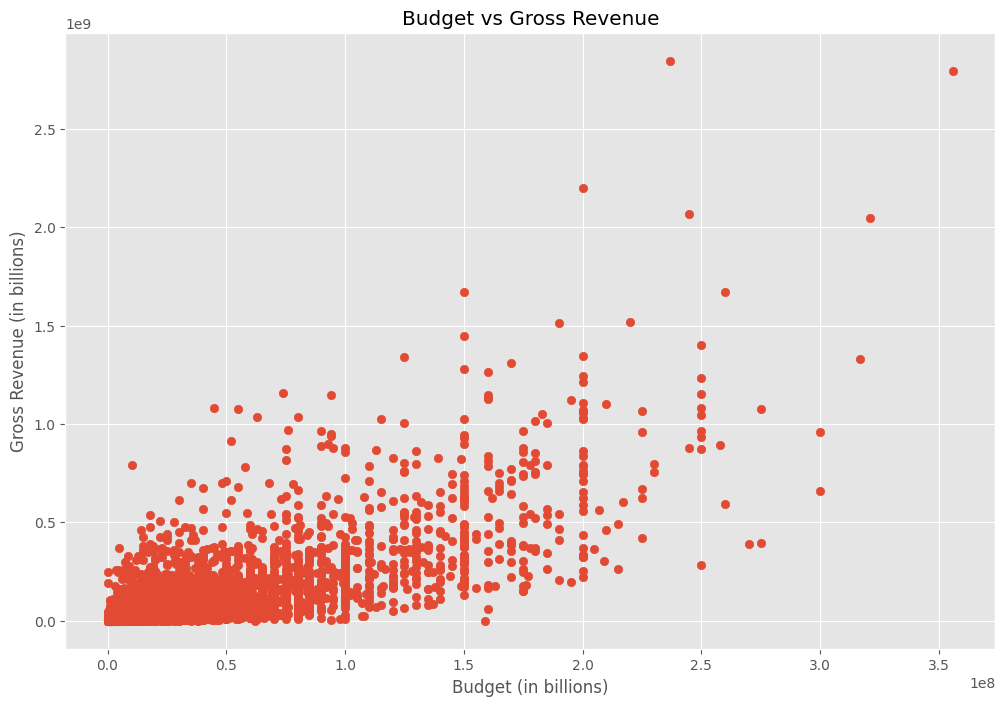

In [62]:
# Analyze the correlation between 'budget', 'gross', and 'company'
# Scatter plot for 'budget' vs 'gross'

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget (in billions)')
plt.ylabel('Gross Revenue (in billions)')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

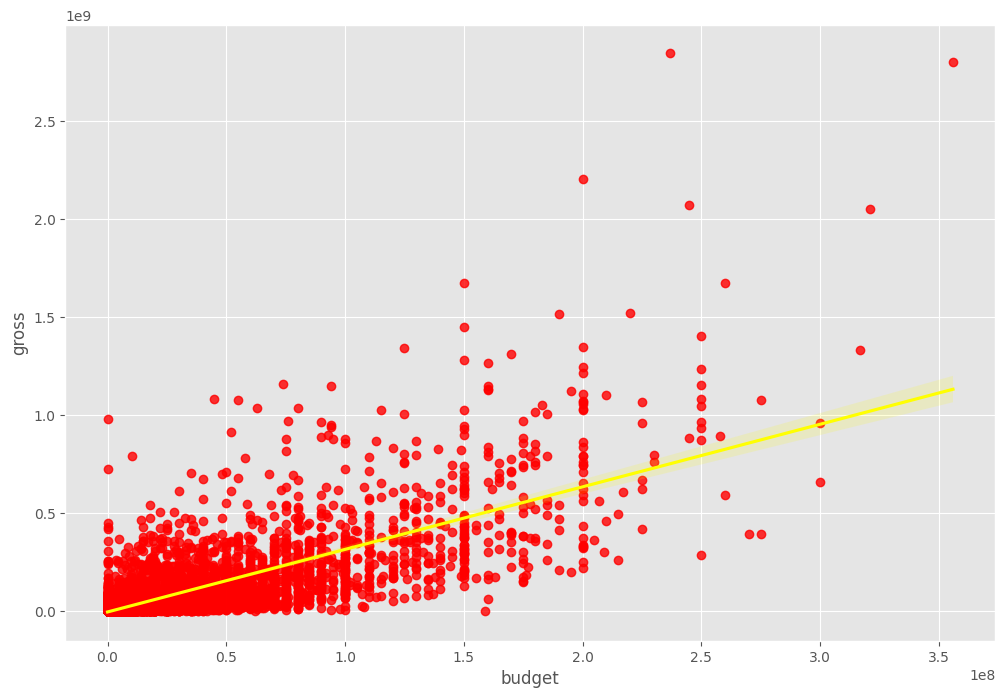

In [ ]:
# Regression plot for 'budget' vs 'gross'
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "yellow"})


Text(0.5, 1.0, 'Correlation Matrix for Numeric Features')

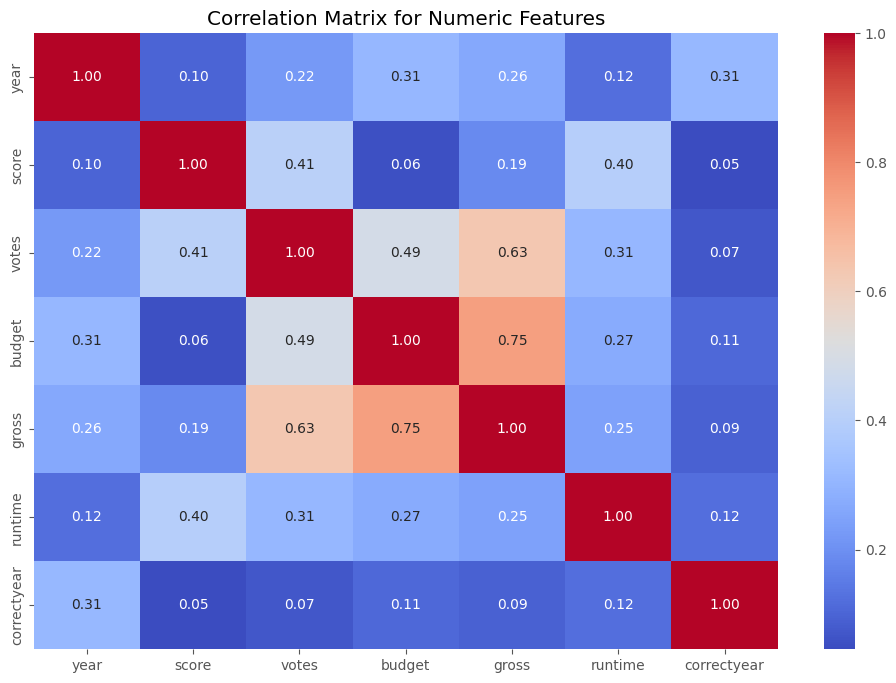

In [ ]:
# Finding correlations
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numeric Features')
# High correlation between budget and gross indicates that movies with higher budgets tend to have higher gross revenues.


Text(0.5, 1.0, 'Correlation Matrix for Numeric and Categorical Features')

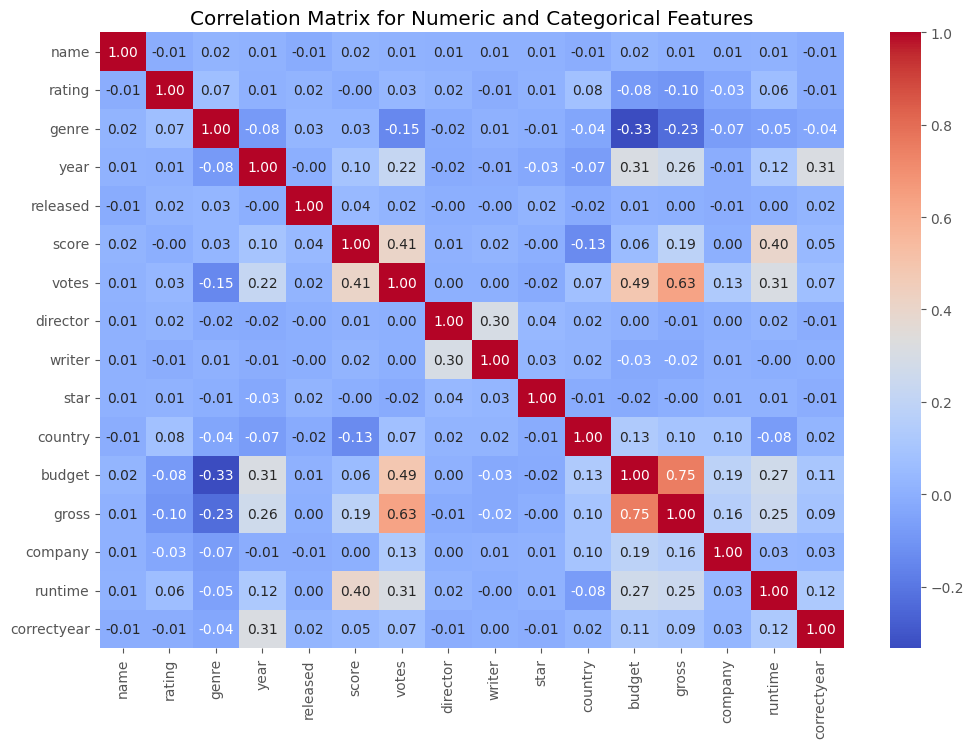

In [ ]:
# Assign each string column a numeric value to include it in the correlation matrix
df_numerized = df
# The for loop below converts all object type columns to category type and then to numeric codes
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# Add the new dataframe to the correlation matrix
complete_correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(complete_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numeric and Categorical Features')

In [55]:
# Visualize correlation by pairs
reduced_matrix = df_numerized.corr()
# Reorganize the matrix by categories
corr_pairs = reduced_matrix.unstack()
# Organizes the matrix by sorted pairs
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs

name         name           1.000000
rating       rating         1.000000
year         year           1.000000
genre        genre          1.000000
votes        votes          1.000000
director     director       1.000000
score        score          1.000000
released     released       1.000000
gross        gross          1.000000
company      company        1.000000
correctyear  correctyear    1.000000
runtime      runtime        1.000000
country      country        1.000000
budget       budget         1.000000
star         star           1.000000
writer       writer         1.000000
gross        budget         0.750157
budget       gross          0.750157
votes        gross          0.632834
gross        votes          0.632834
budget       votes          0.486862
votes        budget         0.486862
             score          0.409182
score        votes          0.409182
             runtime        0.399451
runtime      score          0.399451
correctyear  year           0.312521
y

In [ ]:
#Sort values by correlations descending
High_corr = sorted_pairs[(sorted_pairs) > 0.5]  
High_corr

name         name           1.000000
rating       rating         1.000000
year         year           1.000000
genre        genre          1.000000
votes        votes          1.000000
director     director       1.000000
score        score          1.000000
released     released       1.000000
gross        gross          1.000000
company      company        1.000000
correctyear  correctyear    1.000000
runtime      runtime        1.000000
country      country        1.000000
budget       budget         1.000000
star         star           1.000000
writer       writer         1.000000
gross        budget         0.750157
budget       gross          0.750157
votes        gross          0.632834
gross        votes          0.632834
dtype: float64